###    Create a multi input  Neural Network Based on the functional API of Keras Tensor FLow

* Training of the MultiInput RNN is done in  [Multi_Input3RNN_Perfect_Training](Multi_Input3RNN_Perfect_Training.ipynb)
* Prediction using MultiInput RNN is done in [Multi_Input3RNN_Perfect_Prediction](Multi_Input3RNN_Perfect_Prediction.ipynb)

#### Model's Input
* Input 1 : dims = 5 [load, Bt_Prod, Ht_Prod] where Ht_Prod = [P0010, P0018,P0100]
* Input 2 : dims = 4 [hourly_cycle, daily_cycle, weekly_cycle, yearly_cycle]
* Input 3 : dims = 1 [Boolean var (0,1) indicating wether voltage rise above define threshold occurs durings past periods ]
* Input 4 : dims = 1 [float var indicating the value of voltage rise that occured durings past periods ]


#### Model's output
* Output 1 : dims = 5 [load, Bt_Prod, Ht_Prod] (where Ht_Prod = [P0010, P0018,P0100]) prediction of these variables at the next period
* Output 2 : dims = 1 [Boolean var (0,1) indicating wether voltage rise above define threshold will occur in the next period]
* Output 3 : dims = 1 [float var indicating the prediction of the value of voltage rise that occur in the next period ]


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import pydot

#### Define Inputs i.e. total features for each inputs 

In [5]:
n1 = 5
n2 = 4  
n3 = 1
n4 = 1

actv_func ='relu'


#### Define Inputs for the RNN model

In [6]:
in1 = keras.Input(shape=(None,n1), name='Numeric')  # Input 1 | For the input intanciate only the feature dimension. i.e. create a tensor as 
                                                    # in1.shape = [None, n1]
in2 = keras.Input(shape=(None, n2), name='cyclingdata')   # Input 2 
in3 = keras.Input(shape=(None, n3), name='BinaryVoltageRise')   # Input 23
in4 = keras.Input(shape=(None, n4), name='NumericVoltageRise')

#### Input 1 

##### Create hidden layers

In [7]:
in1_layer1    = layers.LSTM(128, activation=actv_func) # Create the first layer of model 1

##### Link input 1 to hidden layer 1
Since the layer is an LSTM,  one needs to reshape the input such that its dimension in [x,y,z] so they can correspond to a LSTM's. 
- x ==> batch size, 
- y ==> nber_time_step_per batch ,
- z ==> number of feature

In [8]:
in1_layer1_out = in1_layer1(in1)        
# in1_layer1_out = in1_layer1(tf.reshape(in1, (-1, in1_ts, n1 )))        

#### Input 2

##### Create hidden layers and link it to the associated input

In [9]:
in2_layer1 = layers.LSTM(64,activation=actv_func)
in2_layer1_out = in2_layer1(in2)

#### Input 3

In [10]:
##### Create hidden layers
in3_layer1 = layers.LSTM(64,activation=actv_func)
in3_layer1_out = in3_layer1(in3)

#### Input 4

In [11]:
##### Create hidden layers
in4_layer1 = layers.LSTM(64,activation=actv_func)
in4_layer1_out = in4_layer1(in4)

#### Combine layers

In [12]:
comb_out = layers.concatenate([in1_layer1_out, in2_layer1_out, in3_layer1_out, in4_layer1_out])

#### Create an intermediate and the output layer and link them together with 

In [13]:
out_numPred = layers.Dense(n1, activation='relu', name='NumPred')(comb_out)
out_vriseBin = layers.Dense(n3, activation='sigmoid', name='binVrisePred')(comb_out)
out_vriseNum = layers.Dense(n4, activation='relu', name='numVrisePred')(comb_out)


#### Create final model 

In [14]:
mixed_model = keras.Model(inputs=[in1,in2, in3, in4], outputs=[out_numPred, out_vriseBin, out_vriseNum])

#### Show model parameters

In [15]:
mixed_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Numeric (InputLayer)           [(None, None, 5)]    0           []                               
                                                                                                  
 cyclingdata (InputLayer)       [(None, None, 4)]    0           []                               
                                                                                                  
 BinaryVoltageRise (InputLayer)  [(None, None, 1)]   0           []                               
                                                                                                  
 NumericVoltageRise (InputLayer  [(None, None, 1)]   0           []                               
 )                                                                                            

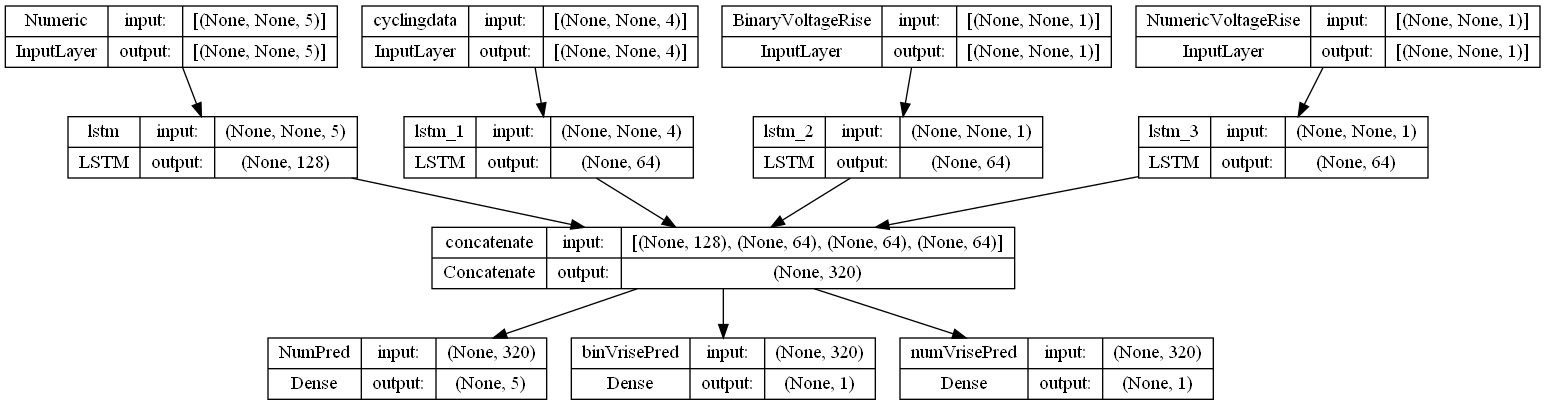

In [16]:
keras.utils.plot_model(mixed_model,show_shapes=True)

In [18]:
mixed_model.save("pickle_files/RNN/MultiInput_perfect")

INFO:tensorflow:Assets written to: pickle_files/RNN/MultiInput_perfect\assets


INFO:tensorflow:Assets written to: pickle_files/RNN/MultiInput_perfect\assets
